In [1]:
from sklearn.manifold import TSNE

#t-SNE function

def plot_tsne(data, n_components=2,perplexity=30, learning_rate=200, title = "t-SNE Plot", labels = None):
    tsne = TSNE(n_components = n_components, perplexity=perplexity, learning_rate=learning_rate)
    tsne_result = tsne.fit_transform(data)

    fig, ax= plt.subplots(figsize=(10,6))
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    if labels is not None:
        scatter = ax.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap = "viridis", s=50, alpha=0.7)
        cbar = fig.colorbar(scatter, ax=ax)
        cbar.set_label('Color intensity')

    
    else:
        ax.scatter(tsne_result[:, 0], tsne_result[:, 1], s=50, alpha=0.7)


    ax.set_title(title)
    plt.show()
    
    

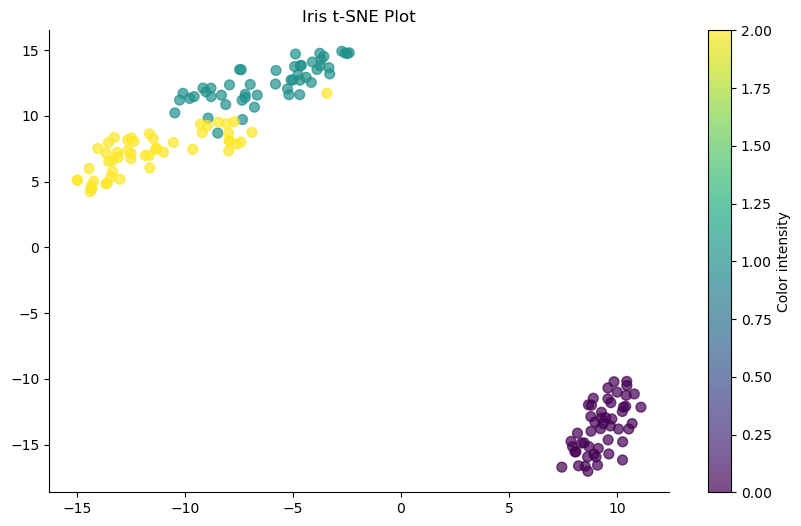

In [2]:
#使用function

from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt


iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

plot_tsne(X, n_components=2, title = "Iris t-SNE Plot", labels = y)
